<h1 style = "color : Brown"> House Price Prediction Assignment</h1>

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

<h2 style = "color : Brown"> Problem Statement</h2>

The company wants to know:-
<ul>
    <li>Which variables are significant in predicting the price of a house, and</li>
    <li>How well those variables describe the price of a house.</li>
</ul>

<h2 style = "color : Brown"> Business Goal</h2>

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

<h2 style = "color : Brown"> Importing Necessary Libraries</h2>

In [1]:
#import the necessary libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import os
import warnings

In [2]:
#hide warnings
warnings.filterwarnings('ignore')
# customizing some aspects of panda behavior
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<h2 style = "color : Brown"> Read the dataset</h2>
We will read the data using read_csv() function of pandas library

In [3]:
#read the csv file
df_house_price_prediction=pd.read_csv('train.csv')

<h2>Visualizing the Data</h2>

In [4]:
#Looking at the data
df_house_price_prediction.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [5]:
#Getting shape of data
df_house_price_prediction.shape

(1460, 81)

In [6]:
#summary of the housing data
df_house_price_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Description of data
df_house_price_prediction.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

<h2>Handling Null values and Droping all the Unwanted columns</h2>

In [8]:
#handling the null values
#The null value sum
df_house_price_prediction.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
null_percent = pd.DataFrame(round(df_house_price_prediction.isnull().sum()/len(df_house_price_prediction.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null_percent.index.name = 'Features'
null_percent.head()

Null %
Features           
PoolQC        99.52
MiscFeature   96.30
Alley         93.77
Fence         80.75
FireplaceQu   47.26

In [10]:
# dataframe with having features with the null values
df_house_price_prediction_null = null_percent[null_percent["Null %"] > 0]
df_house_price_prediction_null

Null %
Features            
PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
LotFrontage    17.74
GarageYrBlt     5.55
GarageCond      5.55
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07

<h2>Dropped columns</h2>
<p>we will drop the </p>
 <p>   'PoolQC',</p>
 <p>   'MiscFeature',</p>
 <p>   'Alley',</p>
<p>    'Fence',</p>
<p>    'FireplaceQu'</p>
<p>    column becuase there are so many missing values and id column is not required
</p>

In [11]:
df_house_price_prediction = df_house_price_prediction.drop(['PoolQC','MiscFeature','Id','Alley','Fence','FireplaceQu'],axis=1)

In [12]:
null_percent = pd.DataFrame(round(df_house_price_prediction.isnull().sum()/len(df_house_price_prediction.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null_percent.index.name = 'Features'
df_house_price_prediction_null = null_percent[null_percent["Null %"] > 0]
df_house_price_prediction_null

Null %
Features            
LotFrontage    17.74
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07

In [13]:
#seeing all the remaining columns
df_house_price_prediction.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
 

In [14]:
#checking all the Categorical columns
df_house_price_prediction.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [15]:
# Checking all the Numeric columns
df_house_price_prediction.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [16]:
# let's look at the columns with the highest percentage of missing values
print('The unique values in the columns with highest number if NAN or missing values')
list_of_columns = ["LotFrontage", "GarageCond", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "BsmtExposure", "BsmtFinType2", "BsmtFinType1", "BsmtCond", "BsmtQual", "MasVnrArea", "MasVnrType", "Electrical"]
for x in list_of_columns:
    print('\n')
    print(x, ' Column: ',df_house_price_prediction[x].value_counts())



The unique values in the columns with highest number if NAN or missing values


LotFrontage  Column:  60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
4

In [17]:
# for the LotFrontage and GarageYrBlt columns, we impute missing values using the median because the feature contains outliers
df_house_price_prediction['LotFrontage'] = df_house_price_prediction['LotFrontage'].fillna(df_house_price_prediction['LotFrontage'].median())

df_house_price_prediction['GarageYrBlt'] = df_house_price_prediction['GarageYrBlt'].fillna(df_house_price_prediction['GarageYrBlt'].median())

# for the "below columns" we will impute the null values with 'mode'
for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual'):
    
    df_house_price_prediction[col] = df_house_price_prediction[col].fillna(df_house_price_prediction[col].mode()[0])
    
# for the "Bsmt" columns we will impute the null values with 'mode'
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual'):
    
    df_house_price_prediction[col] = df_house_price_prediction[col].fillna(df_house_price_prediction[col].mode()[0])
    
# for the columns we will impute the null values with 'mode'

for col in ('MasVnrArea', 'MasVnrType', 'Electrical'):
    
    df_house_price_prediction[col] = df_house_price_prediction[col].fillna(df_house_price_prediction[col].mode()[0])


In [18]:
null_percent = pd.DataFrame(round(df_house_price_prediction.isnull().sum()/len(df_house_price_prediction.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null_percent.index.name = 'Features'
df_house_price_prediction_null = null_percent[null_percent["Null %"] > 0]
df_house_price_prediction_null

Empty DataFrame
Columns: [Null %]
Index: []

In [19]:
# checking for the presence of any more null values
df_house_price_prediction.isnull().values.any()

False

In [20]:
# check Null value
df_house_price_prediction.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [21]:
# Check the shape
df_house_price_prediction.shape

(1460, 75)

In [22]:
df_house_price_prediction.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean     56.897260    69.863699   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.589041     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std      42.300571    22.027677    9981.264932     1.382997     1.112799    30.202904     20.645407   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    23.997022     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min      20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%      20.000000    60.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1962.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%      50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%      70.000000    79.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2001.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000  2009.000000  214000.000000


In [23]:
# checking 'PoolArea', 'MiscVal', '3SsnPorch' columns value count
print(df_house_price_prediction['PoolArea'].value_counts())
print(df_house_price_prediction['MiscVal'].value_counts())
print(df_house_price_prediction['3SsnPorch'].value_counts())

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64


In [24]:
# we drop these columns because they are dominated by a single value and add no additional information to our model
df_house_price_prediction = df_house_price_prediction.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1)

In [25]:
df_house_price_prediction.shape

(1460, 72)

In [26]:
df_house_price_prediction.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000    1460.000000
mean     56.897260    69.863699   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.589041     1.767123   472.980137    94.244521    46.660274      21.954110    15.060959     6.321918  2007.815753  180921.195890
std      42.300571    22.027677    9981.264932     1.382997     1.112799    30.202904     20.645407   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    23.997022     0.747315   213.804841   125.338794    66.256028      61.119149    55.757415     2.703626     1.328095   79442.502883
min      20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     1.000000  2006.000000   34900.000000
25%      20.000000    60.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1962.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     5.000000  2007.000000  129975.000000
50%      50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     6.000000  2008.000000  163000.000000
75%      70.000000    79.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2001.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     8.000000  2009.000000  214000.000000
max     190.000000   313.000000  215245.000000    10.000000     9.000000  2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  2065.000000    572.000000  5642.000000      3.000000      2.000000     3.000000     2.000000      8.000000      3.000000     14.000000     3.

<h2>Outliers treatment
</h2>

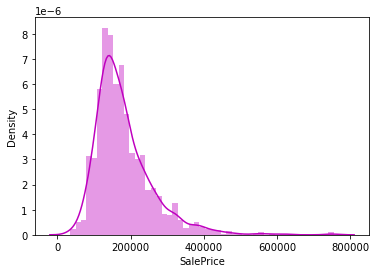

In [27]:
# SalePrice column
plt.figure()
sns.distplot(df_house_price_prediction['SalePrice'],color='m')
plt.show()

In [28]:
# Numeric columns
df_house_price_prediction.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

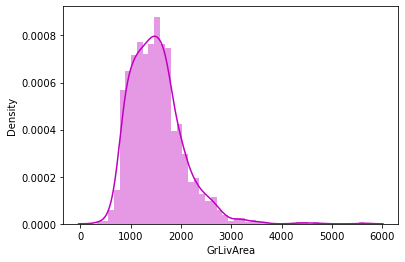

In [29]:
# GrLivArea column
plt.figure()
sns.distplot(df_house_price_prediction['GrLivArea'],color='m')
plt.show()

In [30]:
# we will use IQR to remove the outliers
cols_house_price_prediction = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] # one or more

Q1_house_price_prediction = df_house_price_prediction[cols_house_price_prediction].quantile(0.05)
Q3_house_price_prediction = df_house_price_prediction[cols_house_price_prediction].quantile(0.95)
IQR_house_price_prediction = Q3_house_price_prediction - Q1_house_price_prediction

df_house_price_prediction = df_house_price_prediction[~((df_house_price_prediction[cols_house_price_prediction] < (Q1_house_price_prediction - 1.5 * IQR_house_price_prediction)) |(df_house_price_prediction[cols_house_price_prediction] > (Q3_house_price_prediction + 1.5 * IQR_house_price_prediction))).any(axis=1)]

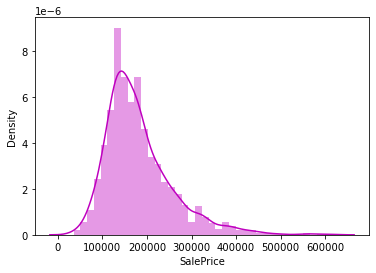

In [31]:
# SalePrice column
plt.figure()
sns.distplot(df_house_price_prediction['SalePrice'],color='m')
plt.show()

In [32]:
# We have now removed some outliers, lets check the infomation
df_house_price_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1333 non-null   int64  
 1   MSZoning       1333 non-null   object 
 2   LotFrontage    1333 non-null   float64
 3   LotArea        1333 non-null   int64  
 4   Street         1333 non-null   object 
 5   LotShape       1333 non-null   object 
 6   LandContour    1333 non-null   object 
 7   Utilities      1333 non-null   object 
 8   LotConfig      1333 non-null   object 
 9   LandSlope      1333 non-null   object 
 10  Neighborhood   1333 non-null   object 
 11  Condition1     1333 non-null   object 
 12  Condition2     1333 non-null   object 
 13  BldgType       1333 non-null   object 
 14  HouseStyle     1333 non-null   object 
 15  OverallQual    1333 non-null   int64  
 16  OverallCond    1333 non-null   int64  
 17  YearBuilt      1333 non-null   int64  
 18  YearRemo

<h2>Plotting the Data</h2>

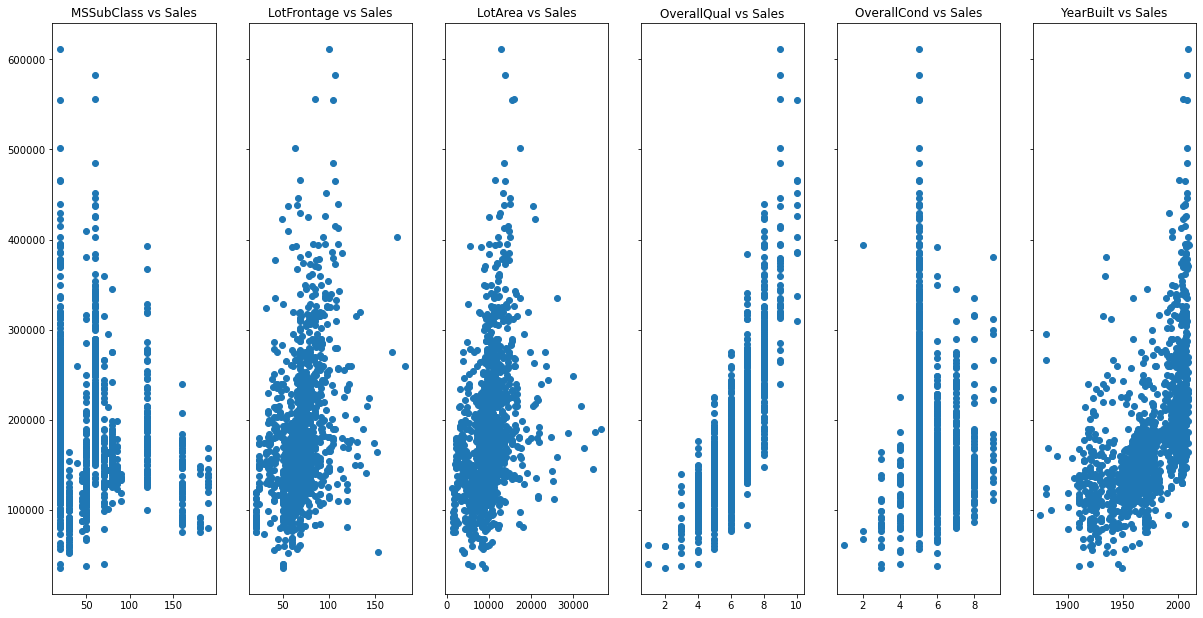

In [33]:
fig, ax = plt.subplots(ncols=6, sharey=True)
list_of_columns_1 = ["MSSubClass", "LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearBuilt"]
flag_i = 0
for x in list_of_columns_1:
    plot_title = x +' vs Sales'
    column = ax[flag_i].scatter(df_house_price_prediction[x], df_house_price_prediction['SalePrice'])
    column.set_label(x)
    ax[flag_i].set_title(plot_title)
    flag_i = flag_i + 1

fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

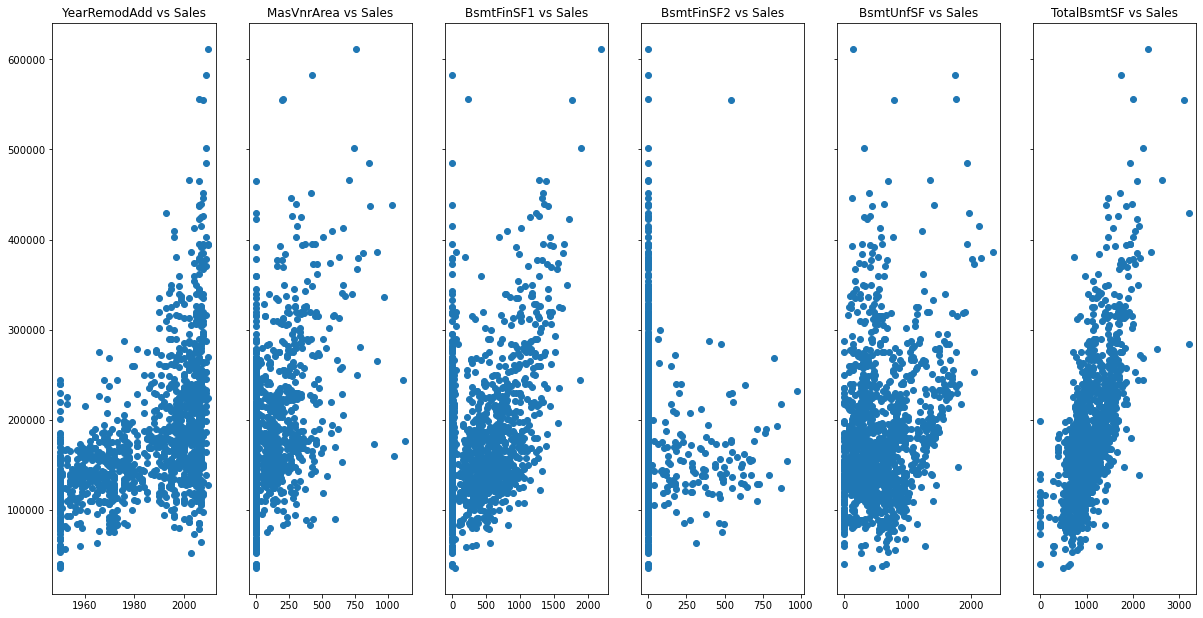

In [34]:
fig, ax = plt.subplots(ncols=6, sharey=True)

list_of_columns_2 = ["YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]
flag_i = 0
for x in list_of_columns_2:
    plot_title = x +' vs Sales'
    column = ax[flag_i].scatter(df_house_price_prediction[x], df_house_price_prediction['SalePrice'])
    column.set_label(x)
    ax[flag_i].set_title(plot_title)
    flag_i = flag_i + 1

fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

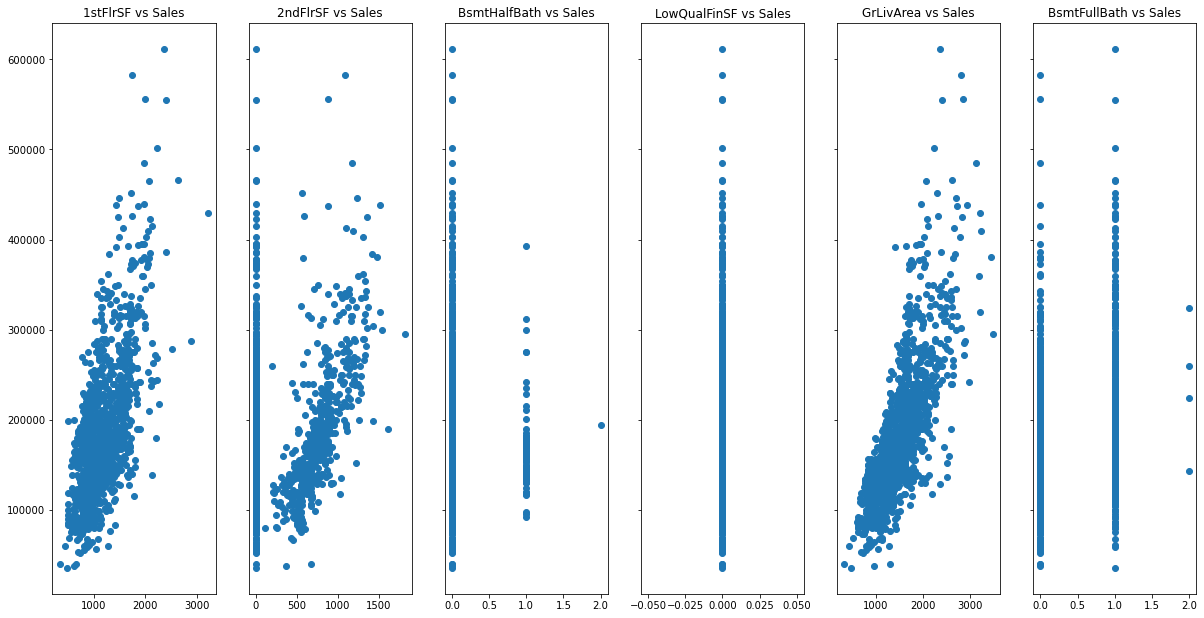

In [35]:
fig, ax = plt.subplots(ncols=6, sharey=True)

list_of_columns_3 = ["1stFlrSF", "2ndFlrSF", "BsmtHalfBath", "LowQualFinSF", "GrLivArea", "BsmtFullBath"]
flag_i = 0
for x in list_of_columns_3:
    plot_title = x +' vs Sales'
    column = ax[flag_i].scatter(df_house_price_prediction[x], df_house_price_prediction['SalePrice'])
    column.set_label(x)
    ax[flag_i].set_title(plot_title)
    flag_i = flag_i + 1

fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

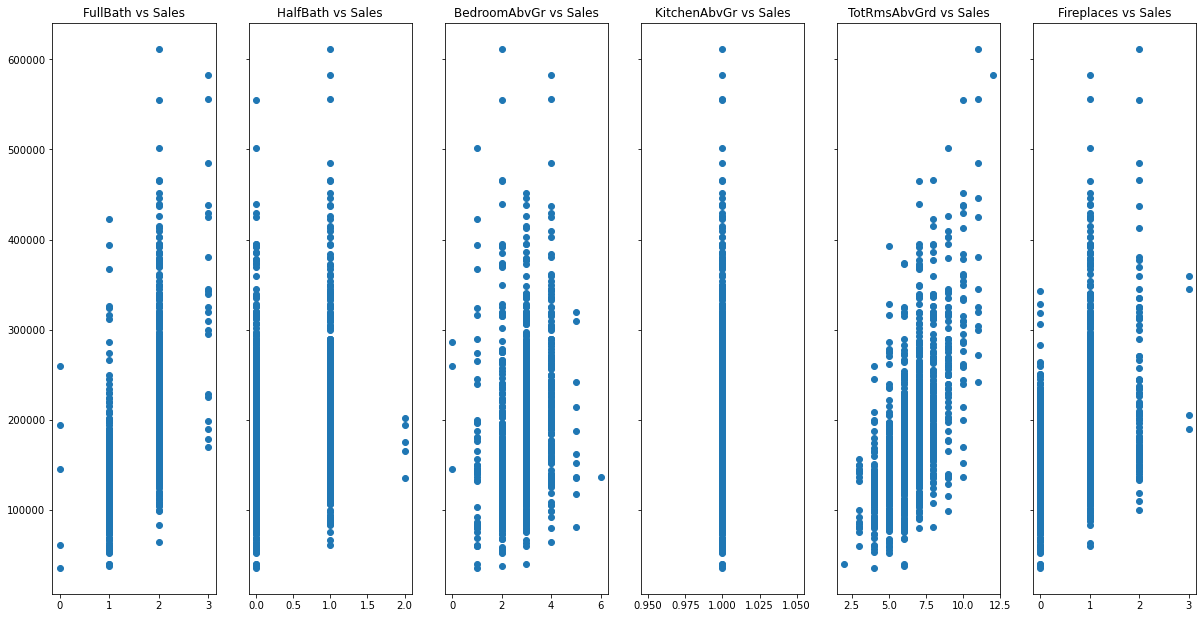

In [36]:
fig, ax = plt.subplots(ncols=6, sharey=True)

list_of_columns_4 = ["FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces"]
flag_i = 0
for x in list_of_columns_4:
    plot_title = x +' vs Sales'
    column = ax[flag_i].scatter(df_house_price_prediction[x], df_house_price_prediction['SalePrice'])
    column.set_label(x)
    ax[flag_i].set_title(plot_title)
    flag_i = flag_i + 1

fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

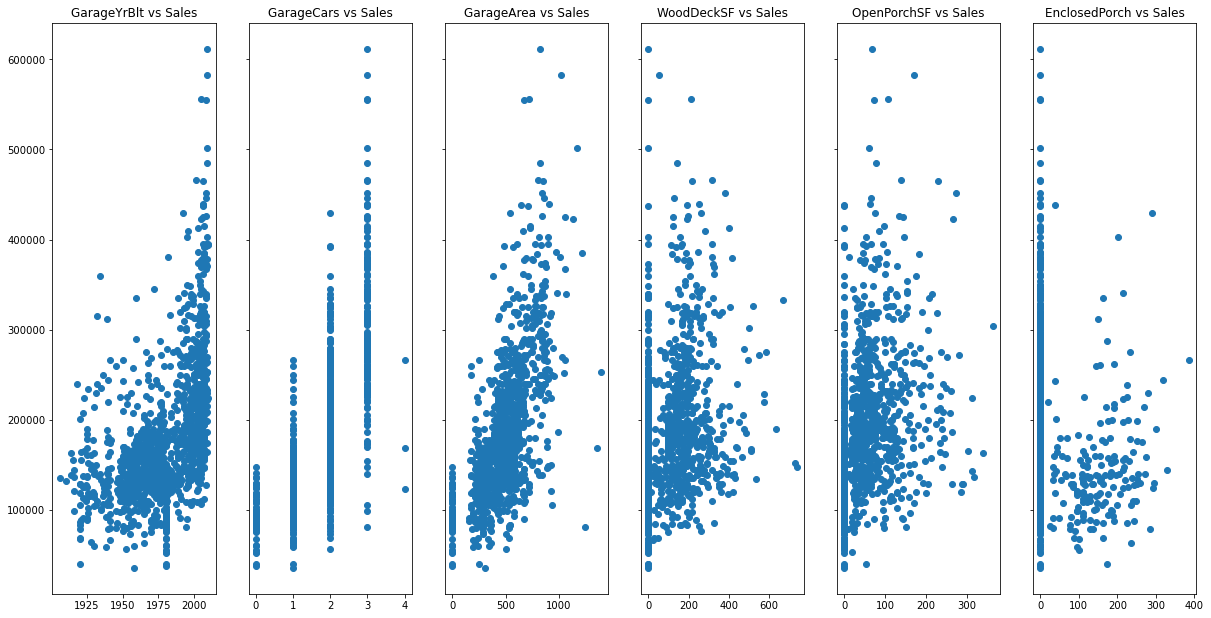

In [37]:
fig, ax = plt.subplots(ncols=6, sharey=True)

list_of_columns_5 = ["GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch"]
flag_i = 0
for x in list_of_columns_5:
    plot_title = x +' vs Sales'
    column = ax[flag_i].scatter(df_house_price_prediction[x], df_house_price_prediction['SalePrice'])
    column.set_label(x)
    ax[flag_i].set_title(plot_title)
    flag_i = flag_i + 1

fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

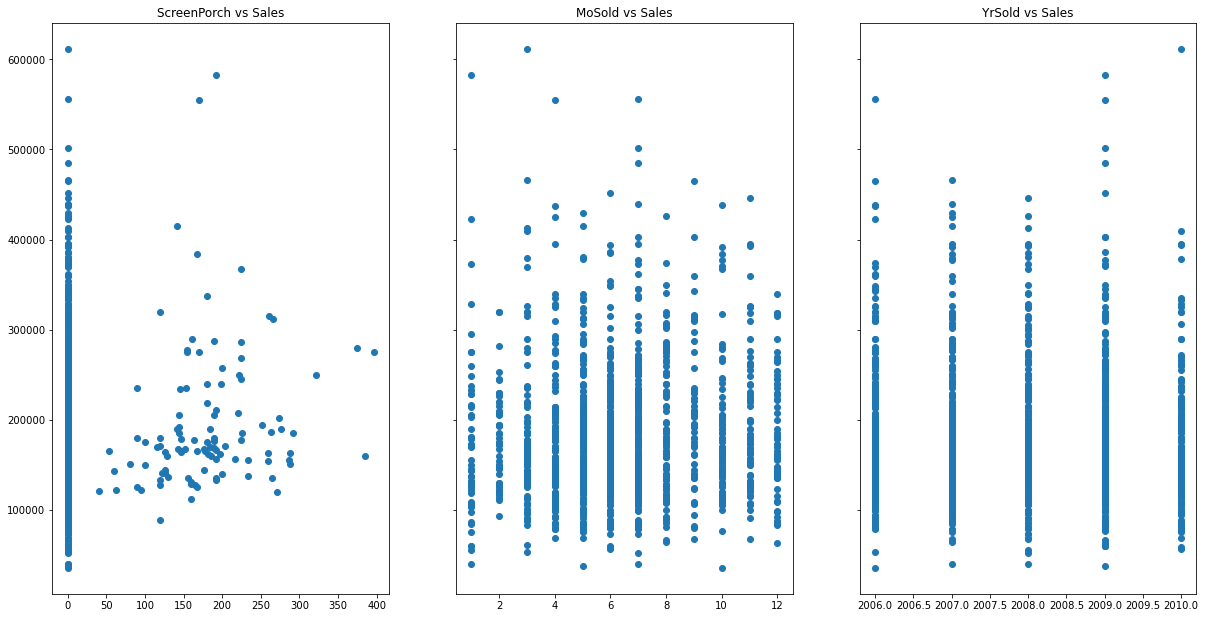

In [38]:
fig, ax = plt.subplots(ncols=3, sharey=True)

list_of_columns_6 = ["ScreenPorch", "MoSold", "YrSold"]
flag_i = 0
for x in list_of_columns_6:
    plot_title = x +' vs Sales'
    column = ax[flag_i].scatter(df_house_price_prediction[x], df_house_price_prediction['SalePrice'])
    column.set_label(x)
    ax[flag_i].set_title(plot_title)
    flag_i = flag_i + 1

fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

In [39]:
#The Categorical columns
df_house_price_prediction.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

<h2>Correlation</h2>
Lets check how these variables are corelated with each other

In [40]:
df_house_price_prediction.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold    YrSold  SalePrice
MSSubClass       1.000000    -0.425187 -0.369099     0.090690    -0.072448   0.122090      0.084129    0.054778   -0.051959   -0.059338  -0.159733    -0.251979 -0.294396  0.311003           NaN   0.050132      0.026717     -0.006741  0.101069  0.227143     -0.118545           NaN     -0.038974   -0.004254     0.120312    0.001658   -0.070819    0.015978     0.012697      -0.038133    -0.021604 -0.017910 -0.018475  -0.048687
LotFrontage     -0.425187     1.000000  0.522820     0.230567    -0.060769   0.146645      0.081453    0.166417    0.132043    0.032642   0.150062     0.318227  0.355994  0.037037           NaN   0.305102      0.055338     -0.014919  0.172703  0.049849      0.263154           NaN      0.309855    0.222612     0.084835    0.306165    0.331507    0.086312     0.135821      -0.007528     0.052996  0.010662  0.007208   0.363022
LotArea         -0.369099     0.522820  1.000000     0.162689    -0.029780   0.054619      0.021362    0.135008    0.183677    0.054700   0.075983     0.299689  0.382030  0.089327           NaN   0.371310      0.089631      0.045155  0.164715  0.080633      0.281025           NaN      0.348038    0.293615     0.006837    0.287988    0.323688    0.171251     0.159597      -0.011207     0.093427 -0.009880 -0.022983   0.362222
OverallQual      0.090690     0.230567  0.162689     1.000000    -0.137345   0.599228      0.550117    0.415273    0.201327   -0.108322   0.344380     0.558339  0.503978  0.288731           NaN   0.641122      0.097250     -0.060343  0.618797  0.257954      0.143843           NaN      0.519535    0.380875     0.531680    0.631896    0.571237    0.227200     0.319979      -0.120626     0.038780  0.084229 -0.004752   0.809823
OverallCond     -0.072448    -0.060769 -0.029780    -0.137345     1.000000  -0.409069      0.041759   -0.137891   -0.039483    0.045371  -0.148921    -0.190837 -0.140903  0.007927           NaN  -0.100764     -0.044657      0.136933 -0.216599 -0.071536      0.018274           NaN     -0.060010   -0.051029    -0.338994   -0.211363   -0.176809   -0.031163    -0.064908       0.090560     0.042613  0.002264  0.044080  -0.123561
YearBuilt        0.122090     0.146645  0.054619     0.599228    -0.409069   1.000000      0.615544    0.310607    0.238567   -0.079815   0.181871     0.429192  0.316285  0.063589           NaN   0.298233      0.179082     -0.047904  0.565665  0.232649     -0.019124           NaN      0.205317    0.145105     0.811446    0.570340    0.509288    0.229533     0.256483      -0.390298    -0.050073  0.026814 -0.004657   0.568003
YearRemodAdd     0.084129     0.081453  0.021362     0.550117     0.041759   0.615544      1.000000    0.177172    0.101417   -0.109414   0.215223     0.308445  0.267731  0.149896           NaN   0.337498      0.108220     -0.022534  0.496577  0.168285     -0.010541           NaN      0.263796    0.093186     0.632908    0.454468    0.396036    0.191081     0.259675      -0.212482    -0.050944  0.023970  0.045584   0.526643
MasVnrArea       0.054778     0.166417  0.135008     0.415273    -0.137891   0.310607      0.177172    1.000000    0.226364   -0.066277   0.123882     0.356874  0.343273  0.146288           NaN   0.392089      0.089578     -0.000441  0.277077  0.196238      0.099981           NaN      0.303113    0.254996     0.252768    0.375337    0.379219    0.156644     0.135263      -0.102353     0.055842 -0.005099  0.007738   0.480634
BsmtFinSF1      -0.051959     0.132043  0.183677     0.201327    -0.039483   0.238567      0.101417    0.226364    1.000000   -0.056726  -0.546126     0.453605  0.

<h2>Letâ€™s visualize these numbers using a heatmap.</h2>

<AxesSubplot:title={'center':'Correlation Matrix'}>

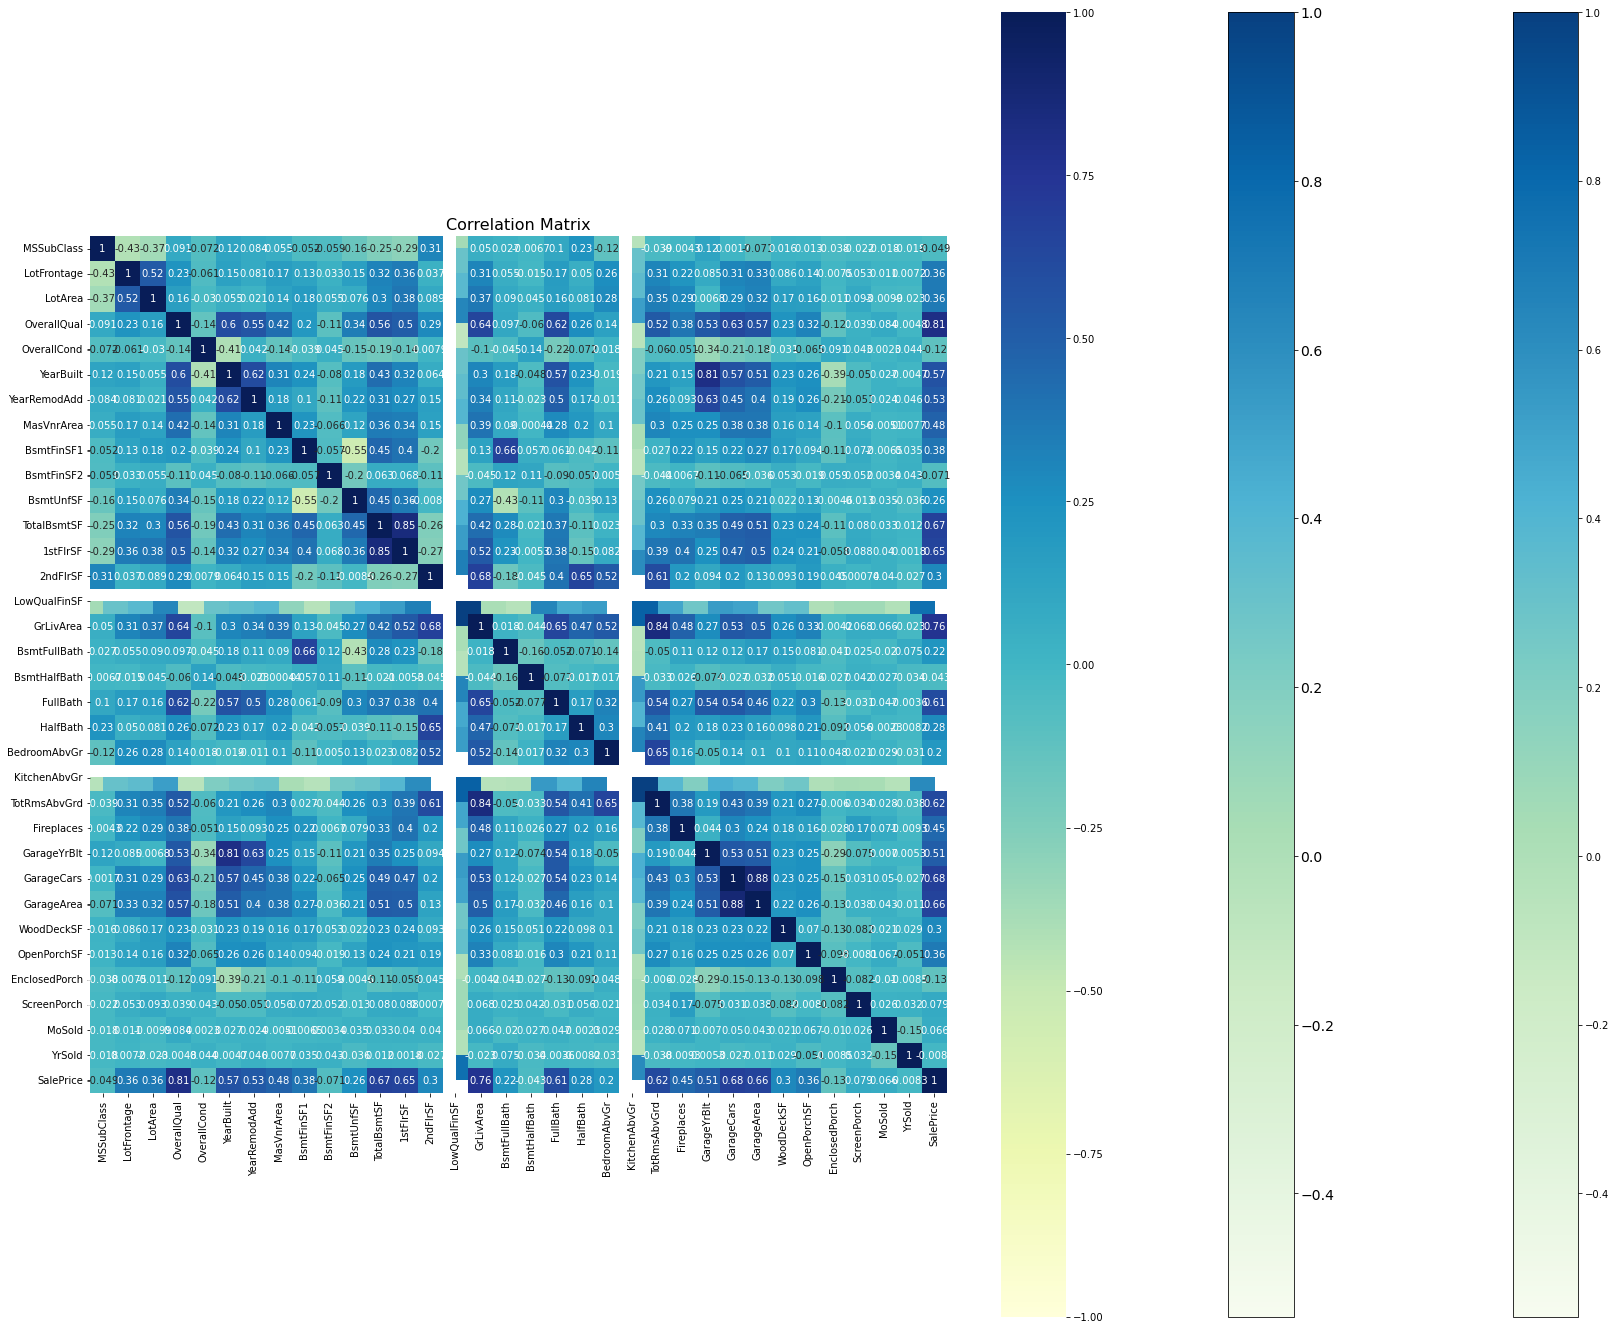

In [41]:
f = plt.figure(figsize=(30, 24))
plt.imshow(df_house_price_prediction.corr(), cmap=plt.cm.GnBu,        interpolation='nearest',data=True)
plt.colorbar()
house_price_points = [i for i in range(len(df_house_price_prediction.columns))]
plt.xticks(house_price_points, df_house_price_prediction.columns, rotation=45)
plt.yticks(house_price_points, df_house_price_prediction.columns, rotation=45)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
sns.heatmap(df_house_price_prediction.corr(),vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")

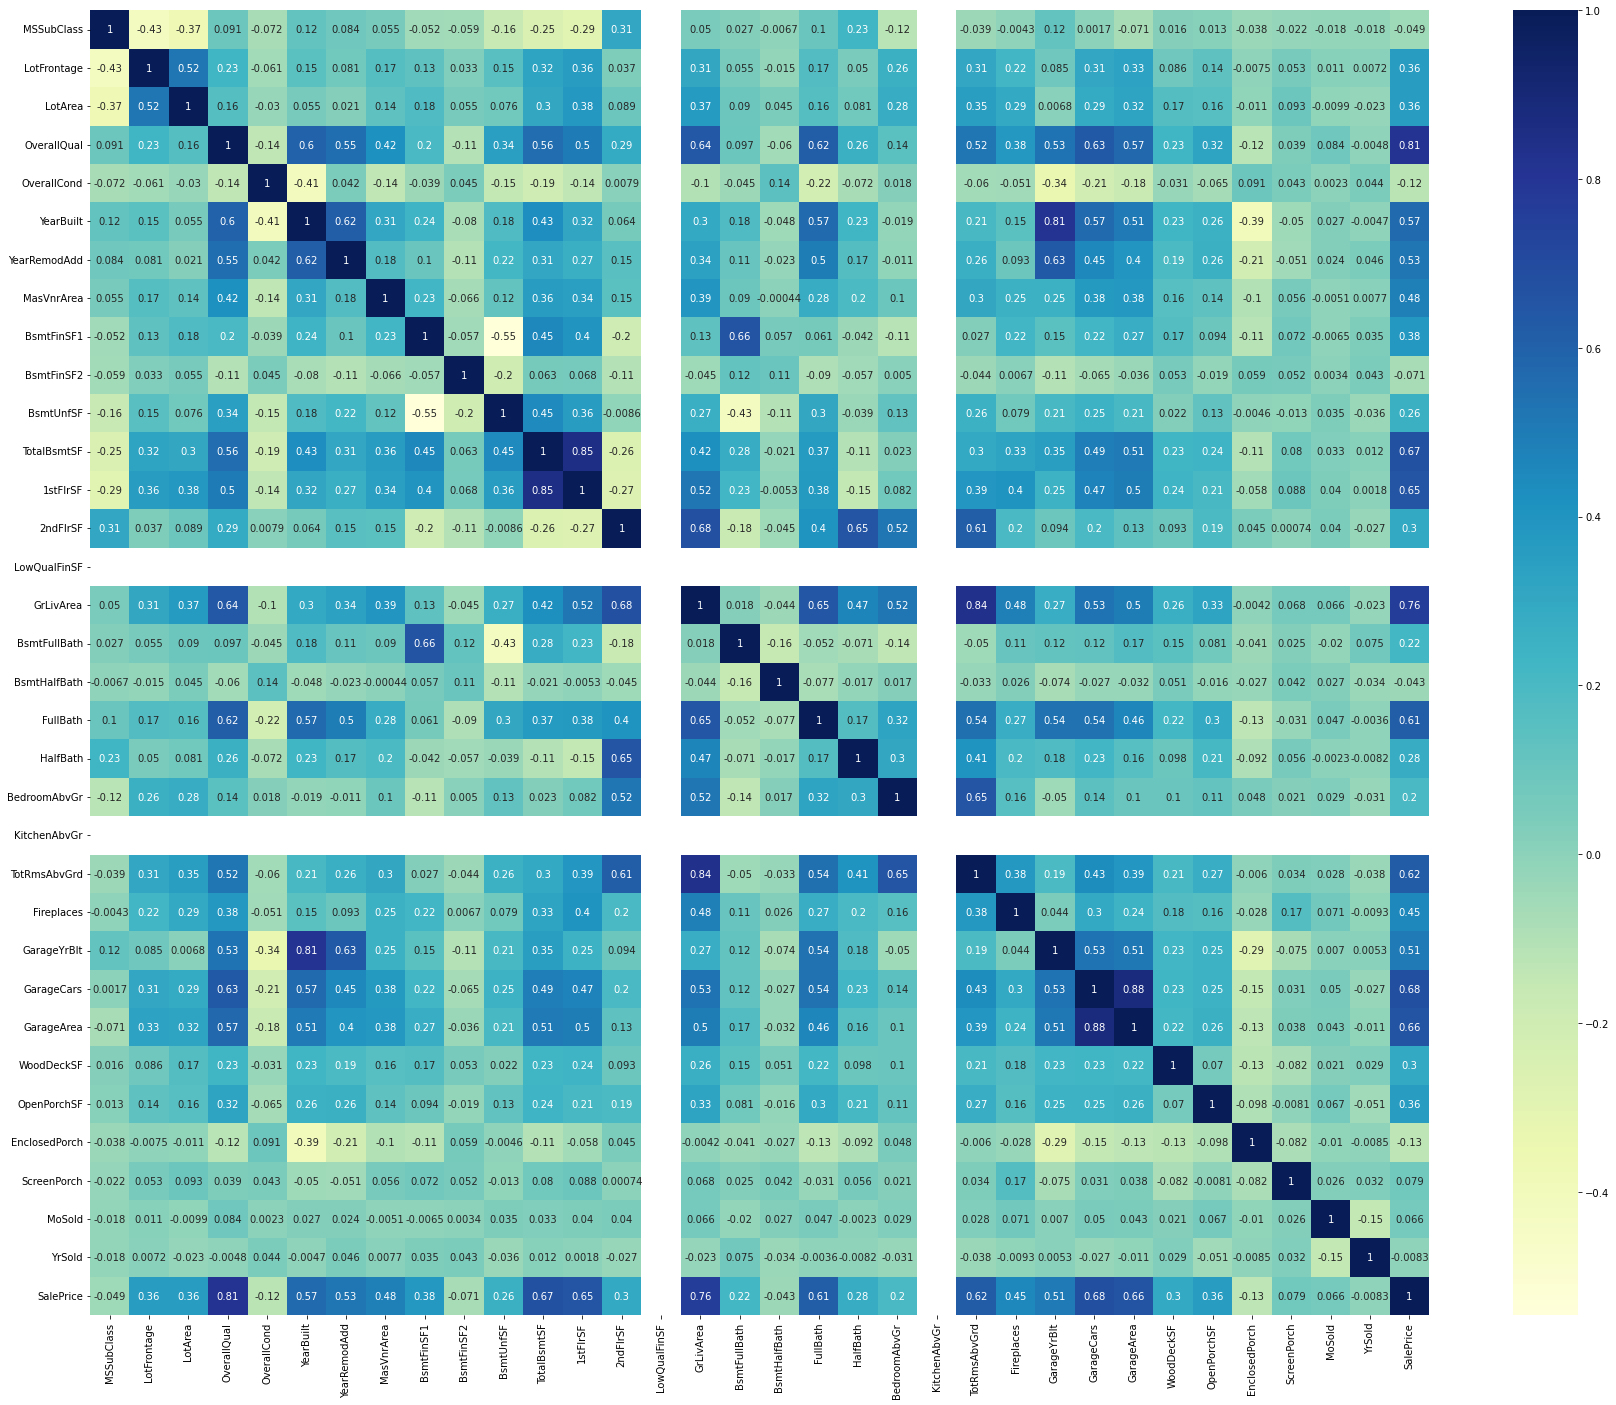

In [42]:
# Let's look at the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 24))
sns.heatmap(df_house_price_prediction.corr(), annot = True, cmap="YlGnBu")
plt.show()

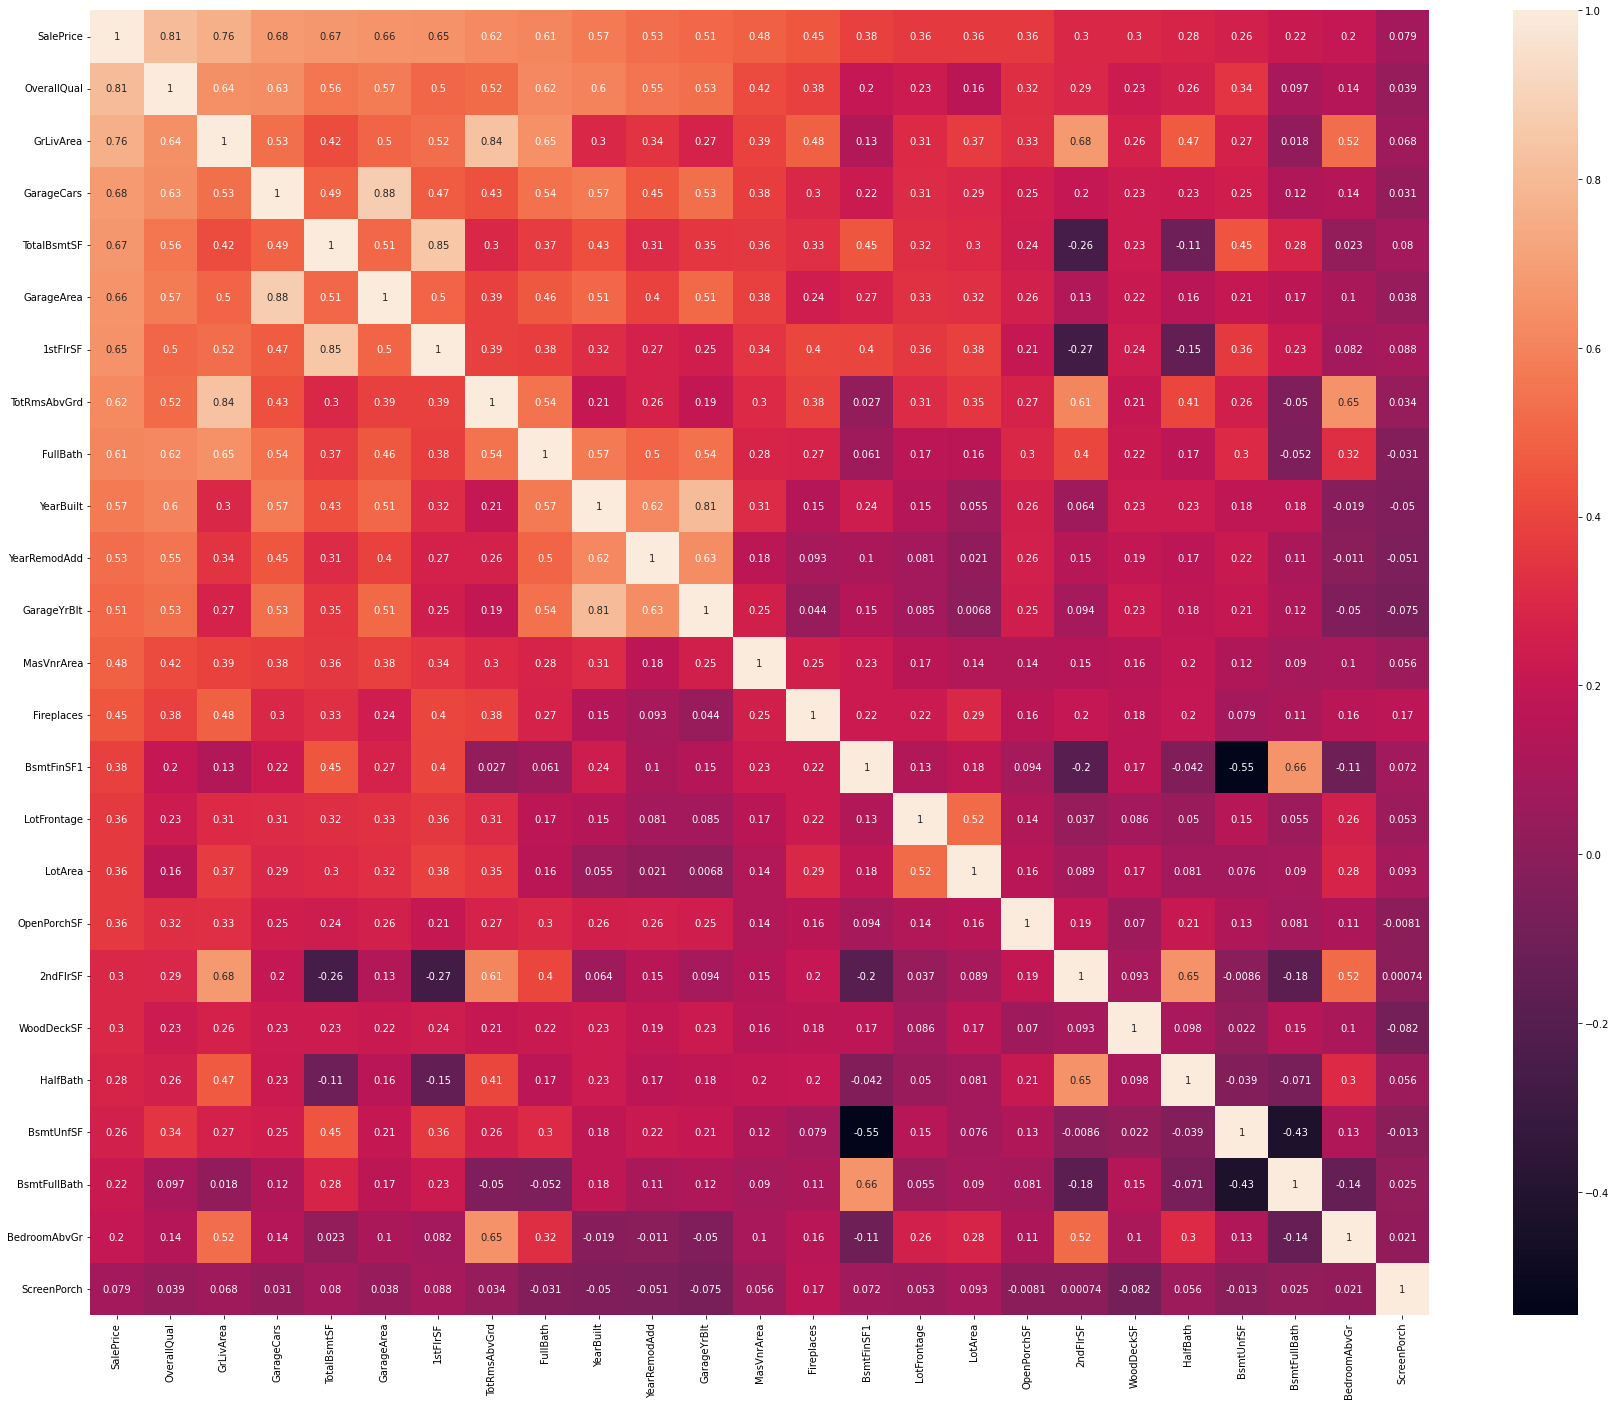

In [43]:
#correlation matrix of sales price 
plt.figure(figsize = (30, 24))
n_corr = 25 # the number of variables that have the highest correlation with "sale price"

corrmat = df_house_price_prediction.corr()

cols_house_price_prediction = corrmat.nlargest(n_corr, 'SalePrice')['SalePrice'].index
#plt.figure(dpi=100)
sns.heatmap(df_house_price_prediction[cols_house_price_prediction].corr(),annot=True)
plt.show()

<h2>Creating Dummy Variables</h2>

In [44]:
#The Categorical columns
df_house_price_prediction.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [45]:
# Converting categorical value into Dummy variable
df_house_price_prediction=pd.get_dummies(df_house_price_prediction,drop_first=True)
df_house_price_prediction.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0          60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0            0       2    2008     208500            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0   
1          20         80.0     9600            6            8       1976          1976         0.0         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0            0       5    2007     181500            0            0            1            0            1             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0   
2          60         68.0    11250            7            5       2001          2002       162.0         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0            0       9    2008     223500            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0   
3          70         60.0     9550        

<h2>Split the data in two different sets</h2>
We will split the data in 7:3 ratio

In [46]:
#Split the data into train and test
y_house_price_prediction = df_house_price_prediction.pop('SalePrice')
y_house_price_prediction.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [47]:
X_house_price_prediction = df_house_price_prediction
X_house_price_prediction.shape

(1333, 221)

In [48]:
#import train_test_split to split the data
from sklearn.model_selection import train_test_split

In [49]:
X_house_price_prediction_train, X_house_price_prediction_test, y_house_price_prediction_train, y_house_price_prediction_test = train_test_split(X_house_price_prediction, y_house_price_prediction, train_size=0.7, test_size=0.3, random_state=50)

In [50]:
X_house_price_prediction_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
1193         120         69.0     4500            6            5       1999          1999       425.0         883           0        341         1224      1224         0             0       1224             1             0         2         0             2             1             5           0       1999.0           2         402           0          304              0            0       6    2009            0            0            0            1            1             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     1                   0                     0                    0   
315           60         71.0     7795            7            5       2004          2005         0.0         425           0        291          716       716       716             0       1432             1             0         2         1             3             1             6           1       2004.0           2         432         100           51              0            0       7    2009            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0   
923          120         50.0     8012            6            5       1993          1994         0.0         165         841        598         1604      1617         0             0       1617             1             0         2         0             2             1             5           1       1993.0           2         533           0           69              0            0       7    2008            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0   
610           60         69.0    11050            9            5       2000   

In [51]:
print('X_house_price_prediction_train shape',X_house_price_prediction_train.shape)
print('X_house_price_prediction_test shape',X_house_price_prediction_test.shape)
print('y_house_price_prediction_train shape',y_house_price_prediction_train.shape)
print('y_house_price_prediction_test shape',y_house_price_prediction_test.shape)

X_house_price_prediction_train shape (933, 221)
X_house_price_prediction_test shape (400, 221)
y_house_price_prediction_train shape (933,)
y_house_price_prediction_test shape (400,)


<h2>Scaling of numeric varaibles</h2>

In [52]:
X_house_price_prediction_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
1193         120         69.0     4500            6            5       1999          1999       425.0         883           0        341         1224      1224         0             0       1224             1             0         2         0             2             1             5           0       1999.0           2         402           0          304              0            0       6    2009            0            0            0            1            1             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     1                   0                     0                    0   
315           60         71.0     7795            7            5       2004          2005         0.0         425           0        291          716       716       716             0       1432             1             0         2         1             3             1             6           1       2004.0           2         432         100           51              0            0       7    2009            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0   
923          120         50.0     8012            6            5       1993          1994         0.0         165         841        598         1604      1617         0             0       1617             1             0         2         0             2             1             5           1       1993.0           2         533           0           69              0            0       7    2008            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0   
610           60         69.0    11050            9            5       2000   

In [53]:
y_house_price_prediction_train.head()

1193    165000
315     188500
923     193000
610     313000
467     146500
Name: SalePrice, dtype: int64

In [54]:
X_house_price_prediction_test.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
900           20         69.0     7340            4            6       1971          1971         0.0         322           0        536          858       858         0             0        858             0             0         1         0             2             1             4           0       1979.0           1         684           0            0              0            0       6    2007            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   1                     0                    0   
1228         120         65.0     8769            9            5       2008          2008       766.0        1540           0        162         1702      1702         0             0       1702             1             0         1         1             1             1             7           1       2008.0           3        1052           0           72              0          224      10    2008            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0   
1015          60         70.0     8400            8            6       2001          2001         0.0         643           0        167          810       810       855             0       1665             1             0         2         1             3             1             6           0       2001.0           2         528           0           45              0            0      11    2009            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    1   
314           70         60.0     9600            7            7       1925   

In [55]:
y_house_price_prediction_test.head()

900     110000
1228    367294
1015    227000
314     178000
35      309000
Name: SalePrice, dtype: int64

In [56]:
# The columns need to be scaled
X_house_price_prediction_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold'], dtype='object')

In [57]:
num_vars_cols= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
           'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold']
X_house_price_prediction_train[num_vars_cols].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold
1193         120         69.0     4500            6            5       1999          1999       425.0         883           0        341         1224      1224         0             0       1224             1             0         2         0             2             1             5           0       1999.0           2         402           0          304              0            0       6    2009
315           60         71.0     7795            7            5       2004          2005         0.0         425           0        291          716       716       716             0       1432             1             0         2         1             3             1             6           1       2004.0           2         432         100           51              0            0       7    2009
923          120         50.0     8012            6            5       1993          1994         0.0         165         841        598         1604      1617         0             0       1617             1             0         2         0             2             1             5           1       1993.0           2         533           0           69              0            0       7    2008
610           60         69.0    11050            9            5       2000          2000       204.0         904           0        536         1440      1476       677             0       2153             1             0         2         1             3             1             8           2       2000.0           3         736         253          142              0            0       5    2009
467           70         79.0     9480            5            7       1942          1995       224.0         386           0        342          728       888       756             0       1644             0             0         1         1             3             1             7           2       1942.0           1         312         168            0              0            0       6    2007

In [58]:
X_house_price_prediction_train.describe()

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch      MoSold       YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
count  933.000000   933.000000    933.000000   933.000000   933.000000   933.000000    933.000000   933.000000   933.000000  933.000000   933.000000   933.000000   933.000000   933.000000         933.0   933.000000    933.000000    933.000000  933.000000  933.000000    933.000000         933.0    933.000000  933.000000   933.000000  933.000000   933.000000  933.000000   933.000000     933.000000   933.000000  933.000000   933.000000   933.000000   933.000000   933.000000   933.000000   933.000000    933.000000    933.000000     933.00000       933.000000       933.000000       933.000000        933.000000         933.000000     933.000000     933.000000        933.000000     933.000000     933.000000            933.000000           933.000000            933.000000            933.000000            933.000000            933.000000            933.000000            933.000000           933.000000            933.000000            933.000000          933.000000            933.000000   
mean    54.346195    69.444802   9722.629153     6.122186     5.559486  1973.291533   1985.703108   105.317256   440.264737   40.964630   577.610932  1058.840300  1146.823151   337.456592           0.0  1484.279743      0.424437      0.052519    1.542337    0.385852      2.845659           1.0      6.398714    0.614148  1978.997856    1.777063   471.734191   97.043944    44.592712      21.013934    12.813505    6.266881  2007.813505     0.045016     0.008574     0.794212     0.146838     0.995713      0.024652      0.006431       0.64523         0.033226         0.023580         0.904609          0.001072           0.062165       0.038585       0.003215          0.738478       0.045016       0.006431              0.001072             0.011790              0.036442              0.017149              0.108253              0.034298              0.070740              0.058950             0.021436              0.015005              0.025723            0.148982              0.007503   
std     40.968050    19.853390   4228.725301     1.357727     1.077446    29.140858     20.838969   173.784244   430.441015  138.837857   437.689449   403.006935   368.135022   424.505766           0.0   482.511936      0.503126      0.227947    0.535818    0.495790      0.738121           0.0      1.502387    0.624167    24.389103    0.729240   205.420458  124.204677    59.557968      58.969229    49.847574    2.647078     1.340821     0.207451     0.092250     0.404493     0.354134     0.065372      0.155144      0.079977       0.47870         0.179323         0.151817         0.293912          0.032739           0.241585       0.192708       0.056644          0.439699       0.207451       0.079977              0.032739             0.107997              0.187487              0.129896              0.310866              0.182091              0.256527              0.235657             0.144911              0.121639              0.158394            0.356261              0.086339   
min     20.000000    21.000

In [59]:
X_house_price_prediction_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
1193         120         69.0     4500            6            5       1999          1999       425.0         883           0        341         1224      1224         0             0       1224             1             0         2         0             2             1             5           0       1999.0           2         402           0          304              0            0       6    2009            0            0            0            1            1             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     1                   0                     0                    0   
315           60         71.0     7795            7            5       2004          2005         0.0         425           0        291          716       716       716             0       1432             1             0         2         1             3             1             6           1       2004.0           2         432         100           51              0            0       7    2009            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0   
923          120         50.0     8012            6            5       1993          1994         0.0         165         841        598         1604      1617         0             0       1617             1             0         2         0             2             1             5           1       1993.0           2         533           0           69              0            0       7    2008            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0   
610           60         69.0    11050            9            5       2000   

In [60]:
#Scaling using MinMax. It will shrink the data between 0 to 1
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler_house_price_prediction=MinMaxScaler()

In [61]:
X_house_price_prediction_train[num_vars_cols] = scaler_house_price_prediction.fit_transform(X_house_price_prediction_train[num_vars_cols])
X_house_price_prediction_test[num_vars_cols] = scaler_house_price_prediction.transform(X_house_price_prediction_test[num_vars_cols])

In [62]:
X_house_price_prediction_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
1193    0.588235     0.298137  0.086315     0.555556         0.50   0.922481      0.816667    0.381166    0.403565    0.000000   0.158384     0.381784  0.270742  0.000000           0.0   0.269761           0.5           0.0  0.666667       0.0      0.333333           0.0         0.250    0.000000         0.89        0.50    0.296460    0.000000     0.835165            0.0          0.0  0.454545    0.75            0            0            0            1            1             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     1                   0                     0                    0   
315     0.235294     0.310559  0.180396     0.666667         0.50   0.961240      0.916667    0.000000    0.194241    0.000000   0.135160     0.223331  0.085881  0.444444           0.0   0.345178           0.5           0.0  0.666667       0.5      0.500000           0.0         0.375    0.333333         0.94        0.50    0.318584    0.137363     0.140110            0.0          0.0  0.545455    0.75            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0   
923     0.588235     0.180124  0.186592     0.555556         0.50   0.875969      0.733333    0.000000    0.075411    0.865226   0.277752     0.500312  0.413755  0.000000           0.0   0.412255           0.5           0.0  0.666667       0.0      0.333333           0.0         0.250    0.333333         0.83        0.50    0.393068    0.000000     0.189560            0.0          0.0  0.545455    0.50            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0   
610     0.235294     0.298137  0.273335     0.888889         0.50 

In [63]:
X_house_price_prediction_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
900     0.000000     0.298137  0.167404     0.333333        0.625   0.705426      0.350000    0.000000    0.147166         0.0   0.248955     0.267623  0.137555  0.000000           0.0   0.137056           0.0           0.0  0.333333       0.0      0.333333           0.0         0.125    0.000000         0.69        0.25    0.504425     0.00000     0.000000       0.000000     0.000000  0.454545    0.25            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   1                     0                    0   
1228    0.588235     0.273292  0.208206     0.888889        0.500   0.992248      0.966667    0.686996    0.703839         0.0   0.075244     0.530880  0.444687  0.000000           0.0   0.443075           0.5           0.0  0.333333       0.5      0.166667           0.0         0.500    0.333333         0.98        0.75    0.775811     0.00000     0.197802       0.000000     0.565657  0.818182    0.50            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0   
1015    0.235294     0.304348  0.197670     0.777778        0.625   0.937984      0.850000    0.000000    0.293876         0.0   0.077566     0.252651  0.120087  0.530726           0.0   0.429659           0.5           0.0  0.666667       0.5      0.500000           0.0         0.375    0.000000         0.91        0.50    0.389381     0.00000     0.123626       0.000000     0.000000  0.909091    0.75            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    1   
314     0.294118     0.242236  0.231933     0.666667        0.750 

In [64]:
X_house_price_prediction_train.describe()

MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF    1stFlrSF    2ndFlrSF  LowQualFinSF   GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch      MoSold      YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
count  933.000000   933.000000  933.000000   933.000000   933.000000  933.000000    933.000000  933.000000  933.000000  933.000000  933.000000   933.000000  933.000000  933.000000         933.0  933.000000    933.000000    933.000000  933.000000  933.000000    933.000000         933.0    933.000000  933.000000   933.000000  933.000000  933.000000  933.000000   933.000000     933.000000   933.000000  933.000000  933.000000   933.000000   933.000000   933.000000   933.000000   933.000000    933.000000    933.000000     933.00000       933.000000       933.000000       933.000000        933.000000         933.000000     933.000000     933.000000        933.000000     933.000000     933.000000            933.000000           933.000000            933.000000            933.000000            933.000000            933.000000            933.000000            933.000000           933.000000            933.000000            933.000000          933.000000            933.000000   
mean     0.202036     0.300899    0.235435     0.569132     0.569936    0.723190      0.595052    0.094455    0.201218    0.042145    0.268282     0.330268    0.242658    0.209470           0.0    0.364133      0.212219      0.026259    0.514112    0.192926      0.474277           0.0      0.424839    0.204716     0.689979    0.444266    0.347887    0.133302     0.122507       0.063679     0.032357    0.478807    0.453376     0.045016     0.008574     0.794212     0.146838     0.995713      0.024652      0.006431       0.64523         0.033226         0.023580         0.904609          0.001072           0.062165       0.038585       0.003215          0.738478       0.045016       0.006431              0.001072             0.011790              0.036442              0.017149              0.108253              0.034298              0.070740              0.058950             0.021436              0.015005              0.025723            0.148982              0.007503   
std      0.240989     0.123313    0.120741     0.150859     0.134681    0.225898      0.347316    0.155860    0.196728    0.142837    0.203293     0.125704    0.133965    0.263505           0.0    0.174950      0.251563      0.113974    0.178606    0.247895      0.123020           0.0      0.187798    0.208056     0.243891    0.182310    0.151490    0.170611     0.163621       0.178695     0.125878    0.240643    0.335205     0.207451     0.092250     0.404493     0.354134     0.065372      0.155144      0.079977       0.47870         0.179323         0.151817         0.293912          0.032739           0.241585       0.192708       0.056644          0.439699       0.207451       0.079977              0.032739             0.107997              0.187487              0.129896              0.310866              0.182091              0.256527              0.235657             0.144911              0.121639              0.158394            0.356261              0.086339   
min      0.000000     0.000000    0.000000     0.000000     0.000000   

In [65]:
X_house_price_prediction_train.shape

(933, 221)

<h2>Model Building and Evaluation</h2>
we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

RFE:- 
Recursive feature elimination

In [66]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [67]:
# Running RFE with variable output number equal to 10
lm_house_price_prediction = LinearRegression()
lm_house_price_prediction.fit(X_house_price_prediction_train, y_house_price_prediction_train)

rfe_house_price_prediction = RFE(lm_house_price_prediction, 25)             # running RFE
rfe_house_price_prediction = rfe_house_price_prediction.fit(X_house_price_prediction_train, y_house_price_prediction_train)

In [68]:
#Finding the top features
list(zip(X_house_price_prediction_train.columns,rfe_house_price_prediction.support_,rfe_house_price_prediction.ranking_))

[('MSSubClass', False, 44),
 ('LotFrontage', False, 120),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 115),
 ('MasVnrArea', False, 92),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 21),
 ('BsmtUnfSF', False, 20),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 35),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 193),
 ('BsmtHalfBath', False, 75),
 ('FullBath', False, 159),
 ('HalfBath', False, 126),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 34),
 ('TotRmsAbvGrd', False, 153),
 ('Fireplaces', False, 183),
 ('GarageYrBlt', False, 121),
 ('GarageCars', False, 4),
 ('GarageArea', False, 190),
 ('WoodDeckSF', False, 109),
 ('OpenPorchSF', False, 91),
 ('EnclosedPorch', False, 195),
 ('ScreenPorch', False, 110),
 ('MoSold', False, 192),
 ('YrSold', False, 177),
 ('MSZoning_FV', False, 22),
 ('MSZoning_RH', False, 26),
 ('MSZoning_RL', False,

In [69]:
# Extracting the top features
col_top_features = X_house_price_prediction_train.columns[rfe_house_price_prediction.support_]
col_top_features

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'LandSlope_Sev', 'Condition2_PosN', 'RoofStyle_Shed', 'RoofMatl_Metal', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_Wood', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Po', 'Heating_OthW', 'Heating_Wall', 'Functional_Mod', 'Functional_Sev'], dtype='object')

In [70]:
# Extracting the non-important features
X_house_price_prediction_train.columns[~rfe_house_price_prediction.support_]

Index(['MSSubClass', 'LotFrontage', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=196)

In [71]:
#Check the shape of train and test
X_house_price_prediction_train1=X_house_price_prediction_train[col_top_features]
X_house_price_prediction_test1=X_house_price_prediction_test[col_top_features]
print(X_house_price_prediction_train1.shape)
print(X_house_price_prediction_test1.shape)
print(y_house_price_prediction_train.shape)
print(y_house_price_prediction_test.shape)

(933, 25)
(400, 25)
(933,)
(400,)


In [72]:
lm1_house_price_prediction=lm_house_price_prediction.fit(X_house_price_prediction_train, y_house_price_prediction_train)

In [73]:
# Print the coefficients and intercept
print(lm1_house_price_prediction.intercept_)
print(lm1_house_price_prediction.coef_)

-5430932915012617.0
[-2.05559899e+04  1.16096490e+04  4.18402782e+04  5.84354406e+04
  3.97637890e+04  2.47183131e+04  7.35108102e+03  1.54418946e+04
  2.51131533e+16  1.11563003e+16  2.47114346e+16 -3.67974266e+16
 -2.38498777e+16 -1.39818606e+16  7.31529841e+15  2.39366677e+16
  4.04125000e+02 -1.18643438e+04  5.41012500e+03  1.11112500e+04
 -2.72320000e+04 -6.55011700e+15  4.39000000e+03  1.48012500e+03
  5.90312500e+03  1.55383750e+04  7.95750000e+02  1.07939375e+04
  1.02758750e+04  2.68375000e+02  1.25741250e+04  5.50000000e+02
 -1.72250000e+03  5.07765000e+04  5.53900625e+04  4.48260000e+04
  4.13465000e+04  2.09732500e+04  5.71375000e+02 -6.75125000e+03
  1.50500000e+03  7.73512500e+03 -1.12974531e+04  3.55375000e+03
 -2.90568125e+04  7.36362500e+03 -7.07450000e+03 -2.05745938e+04
 -1.82050000e+03  4.58518750e+03 -4.41970000e+04  4.50317188e+03
  5.13868750e+03 -5.24575000e+03 -1.02251875e+04 -1.36760000e+04
  9.37850000e+03 -1.99408750e+04 -1.45700000e+04 -7.74300000e+03
 -6.0

In [74]:
#import libraries for model evalution
from sklearn.metrics import r2_score, mean_squared_error

In [75]:
y_house_price_prediction_pred_train = rfe_house_price_prediction.predict(X_house_price_prediction_train)
y_house_price_prediction_pred_test = rfe_house_price_prediction.predict(X_house_price_prediction_test)

metric_house = []

#r2score

r2_house_train_lr = r2_score(y_house_price_prediction_train, y_house_price_prediction_pred_train)
print("R2score of train data: ",r2_house_train_lr)
metric_house.append(r2_house_train_lr)

r2_house_test_lr = r2_score(y_house_price_prediction_test, y_house_price_prediction_pred_test)
print("R2score of test data: ",r2_house_test_lr)
metric_house.append(r2_house_test_lr)

#RSS residual sum of squares
rss1_house_lr = np.sum(np.square(y_house_price_prediction_train - y_house_price_prediction_pred_train))
print("RSS of train data: ",rss1_house_lr)
metric_house.append(rss1_house_lr)

rss2_house_lr = np.sum(np.square(y_house_price_prediction_test - y_house_price_prediction_pred_test))
print("RSS of test data: ",rss2_house_lr)
metric_house.append(rss2_house_lr)
#RMSE  root mean squared error
mse_house_train_lr = mean_squared_error(y_house_price_prediction_train, y_house_price_prediction_pred_train)
print("RMSE of train data: ", mse_house_train_lr)
metric_house.append(mse_house_train_lr**0.5)

mse_house_test_lr = mean_squared_error(y_house_price_prediction_test, y_house_price_prediction_pred_test)
print("RMSE of test data: ", mse_house_test_lr)
metric_house.append(mse_house_test_lr**0.5)

R2score of train data:  0.8942105428595123
R2score of test data:  0.87577600350188
RSS of train data:  565089704725.0079
RSS of test data:  273411867624.93796
RMSE of train data:  605669565.621659
RMSE of test data:  683529669.0623449


<h2>Lasso and Ridge Regression</h2>

In [76]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

<h2>Parameters of alpha</h2>

In [77]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
folds = 5

<h2>Lasso</h2>

In [78]:
lasso_house = Lasso()

# cross validation
lasso_house_model_cv = GridSearchCV(estimator = lasso_house, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_house_model_cv.fit(X_house_price_prediction_train1, y_house_price_prediction_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
print(lasso_house_model_cv.best_params_)
print(lasso_house_model_cv.best_score_)

{'alpha': 50}
-18238.101623023784


In [80]:
alpha =50

lasso_house = Lasso(alpha=alpha)
        
lasso_house.fit(X_house_price_prediction_train1, y_house_price_prediction_train) 
lasso_house.coef_


array([ 52848.75190118, 105105.39336689,  40398.7091083 ,  64466.56968974,
        43393.02673298,  86482.99075506,      0.        ,   1395.45162863,
       178481.8014055 , -21463.377679  ,  -9821.09678491,     -0.        ,
            0.        ,      0.        , -40250.65416112, -39803.67749897,
       -53262.74175813, -15325.67805518, -28874.00601807, -23548.16787349,
            0.        ,     -0.        ,      0.        , -25162.64383495,
       -49522.12147607])

In [81]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_house_price_prediction_pred_train = lasso_house.predict(X_house_price_prediction_train1)
y_house_price_prediction_pred_test = lasso_house.predict(X_house_price_prediction_test1)

metric3_house = []
r2_house_train_lr = r2_score(y_house_price_prediction_train, y_house_price_prediction_pred_train)
print("R2score of train data: ",r2_house_train_lr)
metric3_house.append(r2_house_train_lr)

r2_house_test_lr = r2_score(y_house_price_prediction_test, y_house_price_prediction_pred_test)
print("R2score of test data: ",r2_house_test_lr)
metric3_house.append(r2_house_test_lr)

rss1_house_lr = np.sum(np.square(y_house_price_prediction_train - y_house_price_prediction_pred_train))
print("RSS of train data: ",rss1_house_lr)
metric3_house.append(rss1_house_lr)

rss2_house_lr = np.sum(np.square(y_house_price_prediction_test - y_house_price_prediction_pred_test))
print("RSS of test data: ",rss2_house_lr)
metric3_house.append(rss2_house_lr)

mse_house_train_lr = mean_squared_error(y_house_price_prediction_train, y_house_price_prediction_pred_train)
print("RMSE of train data: ",mse_house_train_lr)
metric3_house.append(mse_house_train_lr**0.5)

mse_house_test_lr = mean_squared_error(y_house_price_prediction_test, y_house_price_prediction_pred_test)
print("RMSE of test data: ",mse_house_test_lr)
metric3_house.append(mse_house_test_lr**0.5)

R2score of train data:  0.8912336023503669
R2score of test data:  0.878789308988491
RSS of train data:  580991463546.4277
RSS of test data:  266779707140.29892
RMSE of train data:  622713251.389526
RMSE of test data:  666949267.8507473


<h2>Ridge</h2>

In [82]:
ridge_house = Ridge()
ridge_house_model_cv = GridSearchCV(estimator = ridge_house, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_house_model_cv.fit(X_house_price_prediction_train1, y_house_price_prediction_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
print(ridge_house_model_cv.best_params_)
print(ridge_house_model_cv.best_score_)

{'alpha': 2.0}
-18139.27914268859


In [84]:
alpha = 2
ridge_house = Ridge(alpha=alpha)
ridge_house.fit(X_house_price_prediction_train1, y_house_price_prediction_train)
ridge_house.coef_

array([ 51663.10883117,  97855.07001837,  38219.80525836,  62304.01093083,
        45569.41093718,  82212.5413881 ,  72801.888155  ,  44806.56102232,
        98710.28225413, -15662.6130033 , -16335.33851376,  -6785.44400328,
         7949.54406153,  10750.28216114, -38570.46881566, -37678.6828759 ,
       -53287.53960185, -19161.58980702, -30389.1881024 , -26526.98830965,
         3020.88966466, -10889.14979278,  13102.2421888 , -26108.86612562,
       -31344.43039842])

In [85]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_house_price_prediction_pred_train = ridge_house.predict(X_house_price_prediction_train1)
y_house_price_prediction_pred_test = ridge_house.predict(X_house_price_prediction_test1)

metric2_house = []
r2_house_train_lr = r2_score(y_house_price_prediction_train, y_house_price_prediction_pred_train)
print("R2score of train data: ",r2_house_train_lr)
metric2_house.append(r2_house_train_lr)

r2_house_test_lr = r2_score(y_house_price_prediction_test, y_house_price_prediction_pred_test)
print("R2score of test data: ",r2_house_test_lr)
metric2_house.append(r2_house_test_lr)

rss1_house_lr = np.sum(np.square(y_house_price_prediction_train - y_house_price_prediction_pred_train))
print("RSS of train data: ",rss1_house_lr)
metric2_house.append(rss1_house_lr)

rss2_house_lr = np.sum(np.square(y_house_price_prediction_test - y_house_price_prediction_pred_test))
print("RSS of test data: ",rss2_house_lr)
metric2_house.append(rss2_house_lr)

mse_house_train_lr = mean_squared_error(y_house_price_prediction_train, y_house_price_prediction_pred_train)
print("RMSE of train data: ",mse_house_train_lr)
metric2_house.append(mse_house_train_lr**0.5)

mse_house_test_lr = mean_squared_error(y_house_price_prediction_test, y_house_price_prediction_pred_test)
print("RMSE of test data: ",mse_house_test_lr)
metric2_house.append(mse_house_test_lr**0.5)

R2score of train data:  0.8905433486525614
R2score of test data:  0.8771752731643605
RSS of train data:  584678553629.1401
RSS of test data:  270332133092.84622
RMSE of train data:  626665116.4299465
RMSE of test data:  675830332.7321155


In [86]:
metric3_house

[0.8912336023503669,
 0.878789308988491,
 580991463546.4277,
 266779707140.29892,
 24954.22311733078,
 25825.36094328107]

In [87]:
# Creating a table which contain all the metrics

lr_house_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_house
        }

lr_house_metric = pd.DataFrame(lr_house_table ,columns = ['Metric', 'Linear Regression'] )

rg_house_metric = pd.Series(metric2_house, name = 'Ridge Regression')
ls_house_metric = pd.Series(metric3_house, name = 'Lasso Regression')

final_house_metric = pd.concat([lr_house_metric, rg_house_metric, ls_house_metric], axis = 1)

final_house_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.942105e-01      8.905433e-01      8.912336e-01
1   R2 Score (Test)       8.757760e-01      8.771753e-01      8.787893e-01
2       RSS (Train)       5.650897e+11      5.846786e+11      5.809915e+11
3        RSS (Test)       2.734119e+11      2.703321e+11      2.667797e+11
4       MSE (Train)       2.461035e+04      2.503328e+04      2.495422e+04
5        MSE (Test)       2.614440e+04      2.599674e+04      2.582536e+04

<h2>Model Evaluation</h2>

In [88]:
ridge_house_pred = ridge_house.predict(X_house_price_prediction_test1)

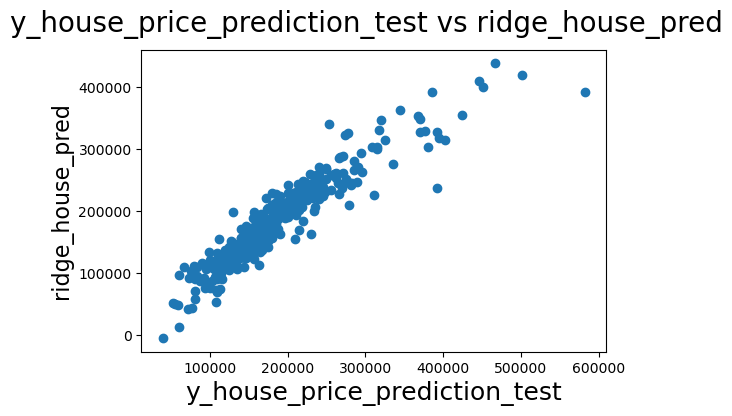

In [89]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_house_price_prediction_test,ridge_house_pred)
fig.suptitle('y_house_price_prediction_test vs ridge_house_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_house_price_prediction_test', fontsize=18)                          # X-label
plt.ylabel('ridge_house_pred', fontsize=16)  
plt.show()

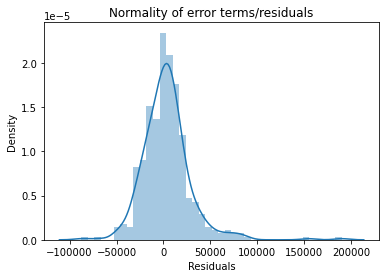

In [90]:
y_house_price_prediction_res=y_house_price_prediction_test-ridge_house_pred
# Distribution of errors
sns.distplot(y_house_price_prediction_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [91]:
lasso_house_pred = lasso_house.predict(X_house_price_prediction_test1)

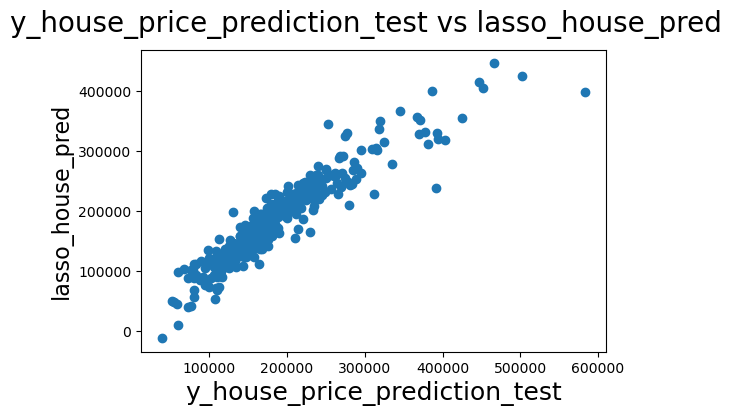

In [92]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_house_price_prediction_test,lasso_house_pred)
fig.suptitle('y_house_price_prediction_test vs lasso_house_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_house_price_prediction_test', fontsize=18)                          # X-label
plt.ylabel('lasso_house_pred', fontsize=16)  
plt.show()

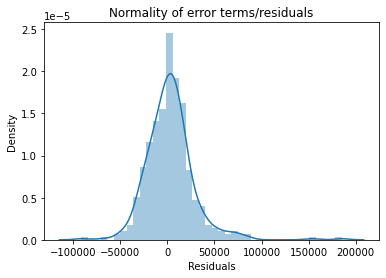

In [93]:
y_house_price_prediction_res=y_house_price_prediction_test-lasso_house_pred
# Distribution of errors
sns.distplot(y_house_price_prediction_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

<h2>Let's look at the changes in coefficients after regularization</h2>

In [94]:
betas_house = pd.DataFrame(index=X_house_price_prediction_train1.columns)

In [95]:
betas_house.rows = X_house_price_prediction_train1.columns

In [96]:
betas_house['Ridge'] = ridge_house.coef_
betas_house['Lasso'] = lasso_house.coef_

In [97]:
pd.set_option('display.max_rows', None)
betas_house.head(70)


Ridge          Lasso
LotArea          51663.108831   52848.751901
OverallQual      97855.070018  105105.393367
OverallCond      38219.805258   40398.709108
YearBuilt        62304.010931   64466.569690
BsmtFinSF1       45569.410937   43393.026733
TotalBsmtSF      82212.541388   86482.990755
1stFlrSF         72801.888155       0.000000
2ndFlrSF         44806.561022    1395.451629
GrLivArea        98710.282254  178481.801405
BedroomAbvGr    -15662.613003  -21463.377679
LandSlope_Sev   -16335.338514   -9821.096785
Condition2_PosN  -6785.444003      -0.000000
RoofStyle_Shed    7949.544062       0.000000
RoofMatl_Metal   10750.282161       0.000000
ExterQual_Fa    -38570.468816  -40250.654161
ExterQual_Gd    -37678.682876  -39803.677499
ExterQual_TA    -53287.539602  -53262.741758
Foundation_Wood -19161.589807  -15325.678055
BsmtQual_Gd     -30389.188102  -28874.006018
BsmtQual_TA     -26526.988310  -23548.167873
BsmtCond_Po       3020.889665       0.000000
Heating_OthW    -10889.149793      -0.000000
Heating_Wall     13102.242189       0.000000
Functional_Mod  -26108.866126  -25162.643835
Functional_Sev  -31344.430398  -49522.121476

<h2>Conclusions:</h2>

<p>Although the Ridge Regression model performed better in terms of R2 values for train and test,
it is better to use Lasso because it fetches and assigns a null value to non-essential features, allowing us to select
predictive variables.
    
It is always advisable to use a simple but robust model.</p>

<h3>Which variables are significant in predicting the price of a house,</h3>

<p>The variables listed below are significant in price prediction:</p>
<ul>
    <li>LotArea (Lot size in square feet)</li>
    <li>OverallQual (Rates the overall material and finish of the house)</li>
    <li>OverallCond (Rates the overall condition of the house)</li>
    <li>YearBuilt (Original construction date)</li>
    <li>BsmtFinSF1 (Type 1 finished square feet)</li>
    <li>TotalBsmtSF (Total square feet of basement area)</li>
    <li>GrLivArea (Above grade (ground) living area square feet)</li>
    <li>TotRmsAbvGrd (Total rooms above grade (does not include bathrooms))</li>
    <li>Street_Pave (Pave road access to property)</li>
</ul>
<h3>How well those variables describe the price of a house.</h3>

<table style="width:500px;text-align:center;font-size:20px;">
    <tr>
        <th>Metric</th>
        <th>Ridge</th>
        <th>Lasso</th>
    </tr>
    <tr>
        <td>R2 Score train</td>
        <td> 0.8905</td>
        <td> 0.8912</td>
    </tr>
    <tr>
        <td>R2 Score test</td>
        <td> 0.8771</td>
        <td> 0.8787</td>
    </tr>
</table>

In [98]:
final_house_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.942105e-01      8.905433e-01      8.912336e-01
1   R2 Score (Test)       8.757760e-01      8.771753e-01      8.787893e-01
2       RSS (Train)       5.650897e+11      5.846786e+11      5.809915e+11
3        RSS (Test)       2.734119e+11      2.703321e+11      2.667797e+11
4       MSE (Train)       2.461035e+04      2.503328e+04      2.495422e+04
5        MSE (Test)       2.614440e+04      2.599674e+04      2.582536e+04

In [99]:
pd.set_option('display.max_rows', None)
betas_house.head(70)

Ridge          Lasso
LotArea          51663.108831   52848.751901
OverallQual      97855.070018  105105.393367
OverallCond      38219.805258   40398.709108
YearBuilt        62304.010931   64466.569690
BsmtFinSF1       45569.410937   43393.026733
TotalBsmtSF      82212.541388   86482.990755
1stFlrSF         72801.888155       0.000000
2ndFlrSF         44806.561022    1395.451629
GrLivArea        98710.282254  178481.801405
BedroomAbvGr    -15662.613003  -21463.377679
LandSlope_Sev   -16335.338514   -9821.096785
Condition2_PosN  -6785.444003      -0.000000
RoofStyle_Shed    7949.544062       0.000000
RoofMatl_Metal   10750.282161       0.000000
ExterQual_Fa    -38570.468816  -40250.654161
ExterQual_Gd    -37678.682876  -39803.677499
ExterQual_TA    -53287.539602  -53262.741758
Foundation_Wood -19161.589807  -15325.678055
BsmtQual_Gd     -30389.188102  -28874.006018
BsmtQual_TA     -26526.988310  -23548.167873
BsmtCond_Po       3020.889665       0.000000
Heating_OthW    -10889.149793      -0.000000
Heating_Wall     13102.242189       0.000000
Functional_Mod  -26108.866126  -25162.643835
Functional_Sev  -31344.430398  -49522.121476